In [276]:
import pandas as pd
import numpy as np
import math
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt  
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image, display  
#from omniplot  import plot as op


In [277]:
shooting = pd.read_csv('/Users/cokoli1/Desktop/Personal Portfolio/Prem2022-23-data/players/player_premier_league_shooting.csv')

In [278]:
def sort_highest(df: pd.DataFrame,columnName: str) -> pd.DataFrame:
    df.sort_values(by = columnName, ascending=False, inplace=True)
    df.reset_index(inplace=True,drop='index')
    return df

def sort_lowest(df: pd.DataFrame,columnName: str) -> pd.DataFrame:
    df.sort_values(by = columnName,inplace=True)
    df.reset_index(inplace=True,drop='index')
    return df

def drop_columns(df: pd.DataFrame,columnNames: list()) -> pd.DataFrame:
    df.drop(columns=columnNames, inplace=True)

    return df



In [279]:

def clean_data(df: pd.DataFrame) -> pd.DataFrame:

    columns_to_drop = ['Unnamed: 0']

    shooting_df = (
        df.sort_values(by='xG', ascending=False)
        .rename(columns={'Pos':'Position'})
        .reset_index(drop=True)
        .fillna(0)
        .drop(columns=columns_to_drop)
        

    )

    return shooting_df



shooting_df = clean_data(shooting)



top10xG = shooting_df.head(10)

def nation_data(df: pd.DataFrame) -> pd.DataFrame:
    df=shooting_df.groupby('Nation').sum()
    




# # Most xG
With this dataset we are going to return the players in the premier league that had the highest XG over the course of the season, to be able to determine who had the most clear cut chances over the course of the season.

xG - This is terminology used within the footballing commmunity to determine the excpected pssobilty to score a specific chance, which ranges from 0-1
    `1 being it is a clear cut opportunity with 100% chance to score, all the way down to 0, which is a 0% chance of scoring a specific chance
Goals - Simply the amount of goals each player scored across the span of 2022/2023 premier league season 

Displaying below is a simple barplot that shows the players goals compared to their xG, it's comparing the players who are very effecient infront of goal, that utilize less expected goals to score

Text(0, 0.5, 'Goals vs xG')

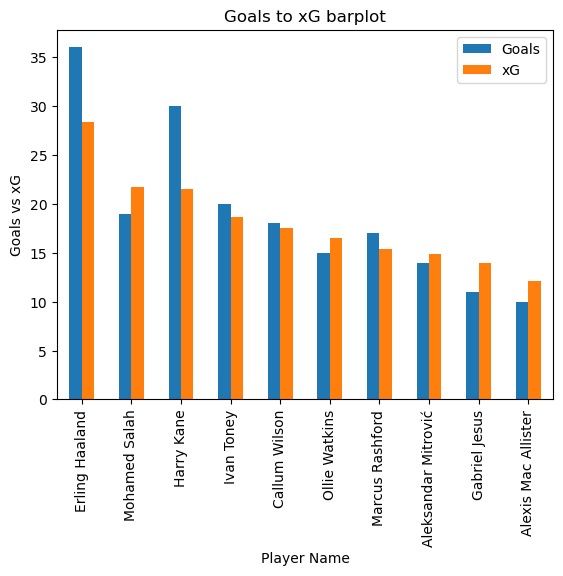

In [280]:
top10xG.reset_index().plot(
    x="Player", y=["Goals", "xG"], kind="bar"
)
plt.title("Goals to xG barplot")
plt.xlabel("Player Name")
plt.ylabel("Goals vs xG")

# # Most Goals

The next visualzation in this dataset is collecting and showing the players that scored the most goals over the span of the 2022/2023 season
from the highest number of goals: "PlayerName(Goals)"
The top three most notable scorers are 
1.)Erling Haaland(36)
2.)Harry kane(30)
3.)Ivan Toney(20)


<AxesSubplot:xlabel='Goals', ylabel='Player'>

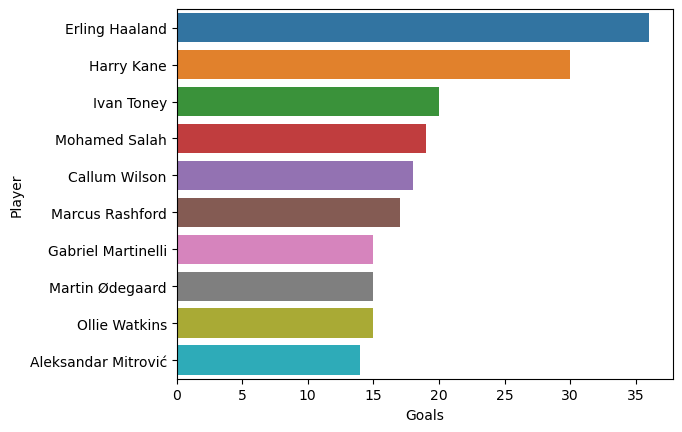

In [281]:
#Returning the top 10 highest goal scorers in the 2022/2023 season first by sorting the dataset by the amount of goals each person scored.
top10Goals = shooting_df.sort_values(by='Goals',ascending=False).head(10)
#simple barplot to show the amount of goals scored by each player 
sns.barplot(x='Goals',y='Player',data=top10Goals)

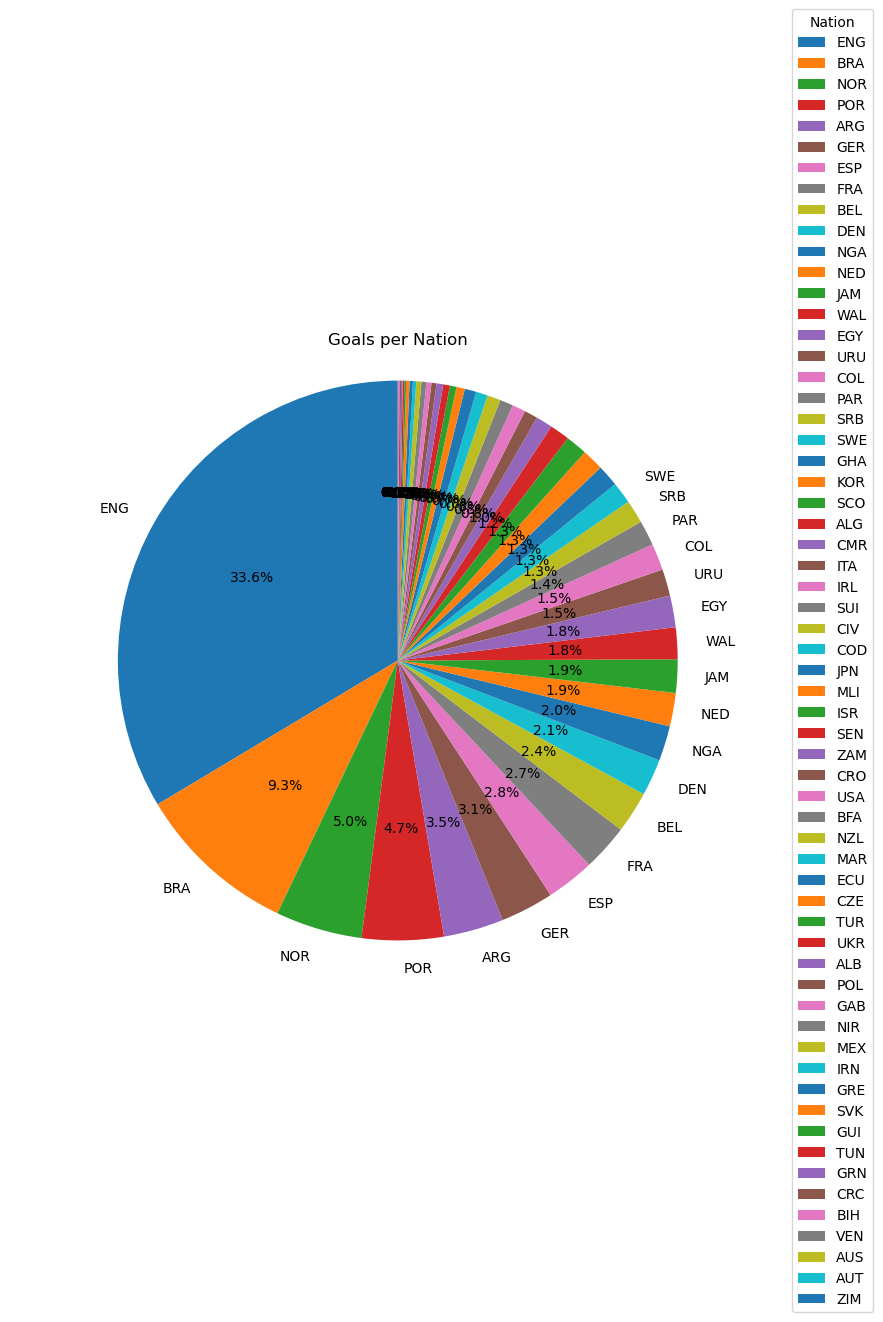

In [282]:
def GoalsperNation(df: pd.DataFrame)-> pd.DataFrame:
    df= df.groupby('Nation').sum()
    df.reset_index(inplace=True)
    df.sort_values(by='Goals',ascending=False, inplace= True)


    df.Nation =df.Nation.str.replace('[a-z\s]','', regex=True)

    
    return df[['Nation','Goals']]



nation_df=GoalsperNation(shooting_df)
nation_df.reset_index(inplace=True,drop='index')



labels = [label if index<20 else '' for index,label in enumerate(nation_df['Nation'])]


fig, ax = plt.subplots(figsize=(10, 8))  # Create figure and axis objects with a specified size  
wedges, texts, autotexts = ax.pie(  
    nation_df['Goals'],  
    labels=labels,  
    autopct='%1.1f%%',  # Display percentages on the pie wedges  
    startangle=90       # Start the first wedge at 90 degrees  
)  
  
# Set the aspect ratio to 'equal' to ensure the pie chart is a circle  
ax.axis('equal')  
  
# Customize legend and its location  
ax.legend(  
    wedges, nation_df['Nation'],   
    title="Nation",  
    loc="center left",   
    bbox_to_anchor=(1, 0.5)  # Place the legend outside of the pie chart  
)  
  
# Optional: Set the title for the plot  
ax.set_title("Goals per Nation")  
  
# Display the plot  
plt.show()  




# # Most Effecient Scorers

Players with the most goals scored with the best conversion rate per shot

Very Insightful, theres a new set of players that joined the list, players with a very common similarity amongst them, mostly come from Arsenal. Three very impactful players to the new playstyle of, these players are Martinelli, Saka and Odegaard

Text(0, 0.5, 'Goals vs xG')

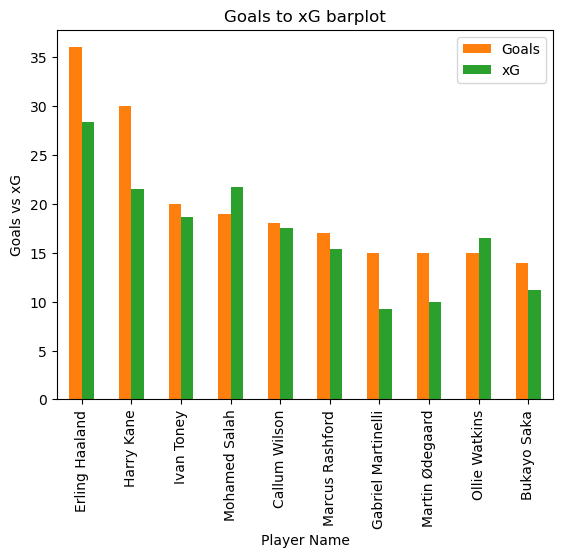

In [283]:
Most_effecient = shooting_df.sort_values(by=['Goals','Goal-xG','Shot_Target_Rate'],ascending=False)
top10eff=Most_effecient.head(10)

top10eff.reset_index().plot(
    x="Player", y=["Goals", "xG"], kind="bar", color=['#ff7f0e', '#2ca02c']
)

plt.title("Goals to xG barplot")
plt.xlabel("Player Name")
plt.ylabel("Goals vs xG")




In [284]:
"""The top 20 players with the most effecient scoring grouped by the team they play for - Returns Arsenal as the most effecient team based of the team
with the most players amongst the top 20 list for effeciency 
 """
top20eff = Most_effecient.head(20)
mosteffecientTeam= top20eff.groupby('Squad').count()

mosteffecientTeam.rename(columns= {'Player':'Count'},inplace=True)
mosteffecientTeam.reset_index(inplace=True)
sort_highest(mosteffecientTeam[['Squad','Count']],'Count')

,Squad,Count
0,Arsenal,4
1,Newcastle Utd,3
2,Liverpool,2
3,Manchester City,2
4,Aston Villa,1
5,Brentford,1
6,Crystal Palace,1
7,Fulham,1
8,Leeds United,1
9,Leicester City,1


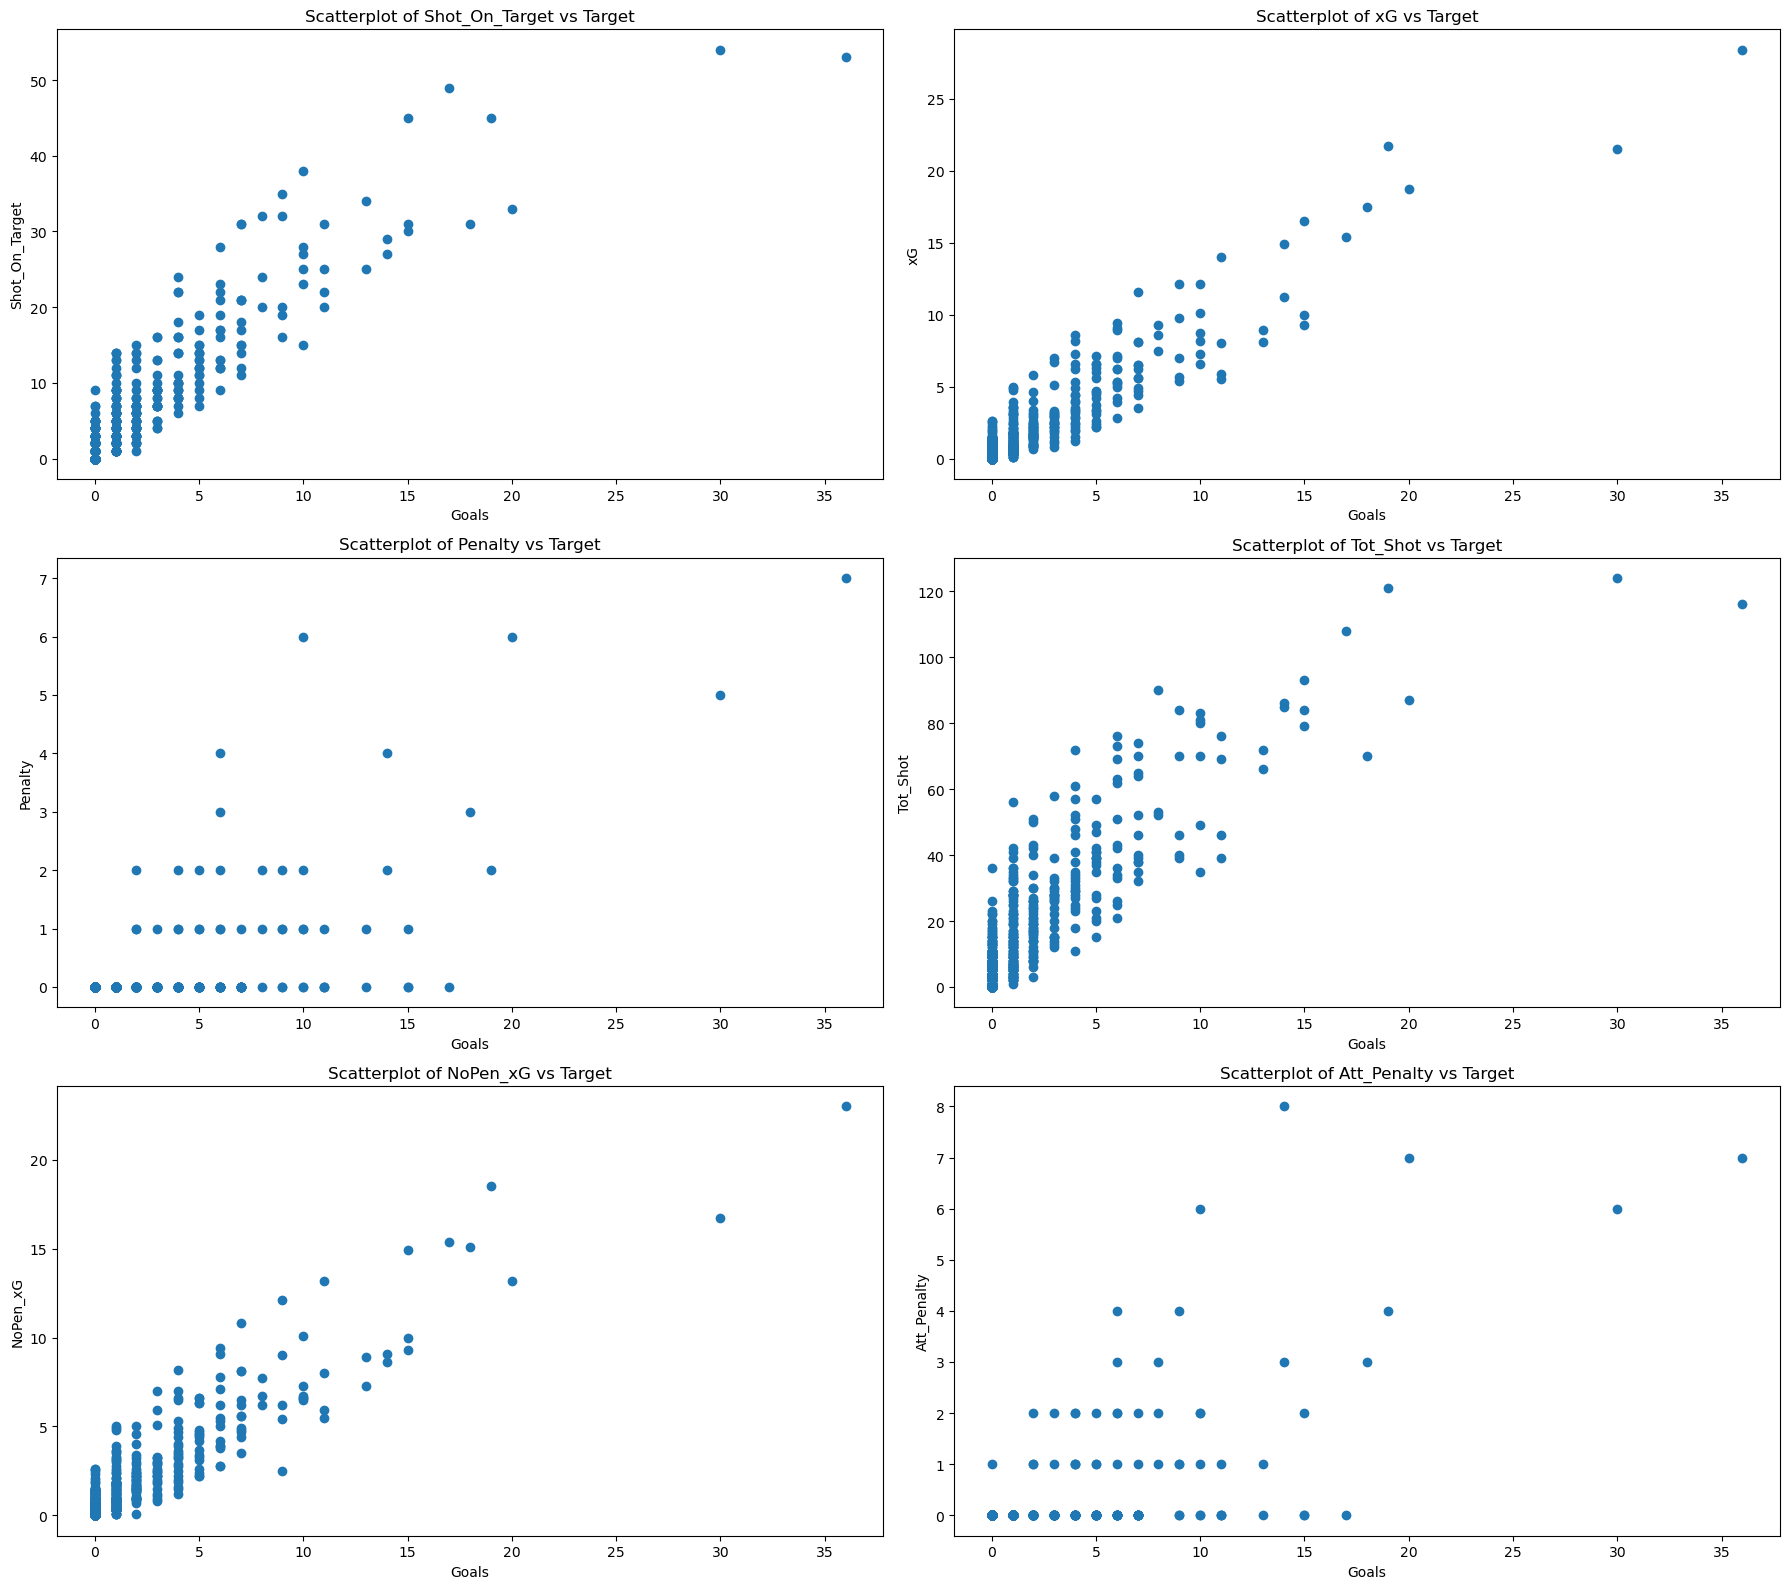

In [285]:

features = ['Shot_On_Target','xG', 'Penalty', 'Tot_Shot','NoPen_xG','Att_Penalty']


num_features = len(features)
num_columns = 2  # For example, 2 columns  
num_rows = np.ceil(num_features / num_columns).astype(int)  # Calculate the required number of rows 

fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(6*3,4*4))

axes=axes.flatten()

if num_features == 1:
    axes= [axes]

for i, feature in enumerate(features):  
    axes[i].scatter(shooting_df['Goals'], shooting_df[feature])  
    axes[i].set_xlabel('Goals')  
    axes[i].set_ylabel(feature)  
    axes[i].set_title(f'Scatterplot of {feature} vs Target')  
  
# Adjust layout for better fit  
plt.tight_layout()  
plt.show()  



# # Highest scoring Defender



In [286]:
defender_shooting = shooting_df[shooting_df['Position'].str.contains('DF')]
sort_highest(defender_shooting,'Goals')


defender_shooting.reset_index(inplace=True,drop='index')

defender_shooting.Position= defender_shooting.Position.str.replace('MF,DF','DF,MF')
defender_shooting.Position= defender_shooting.Position.str.replace('FW,DF','DF,FW')







defender_shooting.head(10)


,Player,Nation,Position,Squad,Age,90s_played,Goals,Tot_Shot,Shot_On_Target,Shot_Target_Rate,...,ShotTargetPer90,Goal/TotShot,Goal/ShotTarget,Penalty,Att_Penalty,xG,NoPen_xG,NoPen_xGperShot,Goal-xG,NoPen_Goal-xG
0,Pascal Groß,de GER,"DF,MF",Brighton,31,36.0,9,39,19,48.7,...,0.53,0.23,0.47,0,0,5.4,5.4,0.14,3.6,3.6
1,Solly March,eng ENG,"DF,FW",Brighton,28,30.2,7,74,31,41.9,...,1.03,0.09,0.23,0,0,8.1,8.1,0.11,-1.1,-1.1
2,Bobby Reid,jm JAM,"DF,FW",Fulham,29,27.5,4,31,10,32.3,...,0.36,0.13,0.40,0,0,3.9,3.9,0.13,0.1,0.1
3,Ethan Pinnock,jm JAM,DF,Brentford,29,30.0,3,15,8,53.3,...,0.27,0.20,0.38,0,0,3.0,3.0,0.21,0.0,0.0
4,Vitaly Janelt,de GER,"DF,MF",Brentford,24,24.5,3,14,5,35.7,...,0.20,0.21,0.60,0,0,2.4,2.4,0.17,0.6,0.6
5,Rasmus Nissen,dk DEN,DF,Leeds United,25,21.8,3,13,5,38.5,...,0.23,0.23,0.60,0,0,0.8,0.8,0.06,2.2,2.2
6,Virgil van Dijk,nl NED,DF,Liverpool,31,31.5,3,30,9,30.0,...,0.29,0.10,0.33,0,0,2.6,2.6,0.09,0.4,0.4
7,Pedro Porro,es ESP,"DF,MF",Tottenham,22,12.6,3,26,7,26.9,...,0.56,0.12,0.43,0,0,1.8,1.8,0.07,1.2,1.2
8,Ben Mee,eng ENG,DF,Brentford,32,36.3,3,28,7,25.0,...,0.19,0.11,0.43,0,0,3.2,3.2,0.12,-0.2,-0.2
9,Gabriel Dos Santos,br BRA,DF,Arsenal,24,37.9,3,32,9,28.1,...,0.24,0.09,0.33,0,0,5.1,5.1,0.16,-2.1,-2.1


<AxesSubplot:>

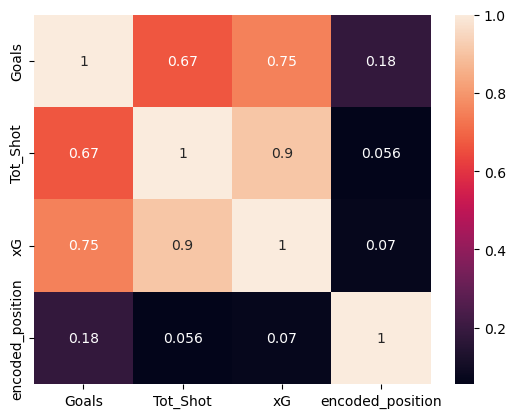

In [287]:

from sklearn.preprocessing import LabelEncoder

le_position = LabelEncoder()

defender_shooting['encoded_position'] = le_position.fit_transform(defender_shooting['Position'])

correlation_features= defender_shooting[['Position','Goals','Tot_Shot','xG','encoded_position']]

correlation_pos= correlation_features.corr()

sns.heatmap(correlation_pos,annot=True)


,Player,Nation,Position,Squad,Age,90s_played,Goals,Tot_Shot,Shot_On_Target,Shot_Target_Rate,...,ShotTargetPer90,Goal/TotShot,Goal/ShotTarget,Penalty,Att_Penalty,xG,NoPen_xG,NoPen_xGperShot,Goal-xG,NoPen_Goal-xG
0,Erling Haaland,no NOR,FW,Manchester City,22,30.8,36,116,53,45.7,...,1.72,0.25,0.55,7,7,28.4,23.0,0.20,7.6,6.0
1,Mohamed Salah,eg EGY,FW,Liverpool,30,36.6,19,121,45,37.2,...,1.23,0.14,0.38,2,4,21.7,18.5,0.15,-2.7,-1.5
2,Harry Kane,eng ENG,FW,Tottenham,29,37.8,30,124,54,43.5,...,1.43,0.20,0.46,5,6,21.5,16.7,0.13,8.5,8.3
3,Ivan Toney,eng ENG,FW,Brentford,26,32.8,20,87,33,37.9,...,1.01,0.16,0.42,6,7,18.7,13.2,0.15,1.3,0.8
4,Callum Wilson,eng ENG,FW,Newcastle Utd,30,20.9,18,70,31,44.3,...,1.49,0.21,0.48,3,3,17.5,15.1,0.22,0.5,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,Yasin Ayari,se SWE,MF,Brighton,18,0.7,0,1,0,0.0,...,0.00,0.00,0.00,0,0,0.0,0.0,0.02,0.0,0.0
565,Ethan Nwaneri,eng ENG,FW,Arsenal,15,0.0,0,0,0,0.0,...,0.00,0.00,0.00,0,0,0.0,0.0,0.00,0.0,0.0
566,Odeluga Offiah,eng ENG,DF,Brighton,19,0.3,0,0,0,0.0,...,0.00,0.00,0.00,0,0,0.0,0.0,0.00,0.0,0.0
567,Robin Olsen,se SWE,GK,Aston Villa,32,3.1,0,0,0,0.0,...,0.00,0.00,0.00,0,0,0.0,0.0,0.00,0.0,0.0


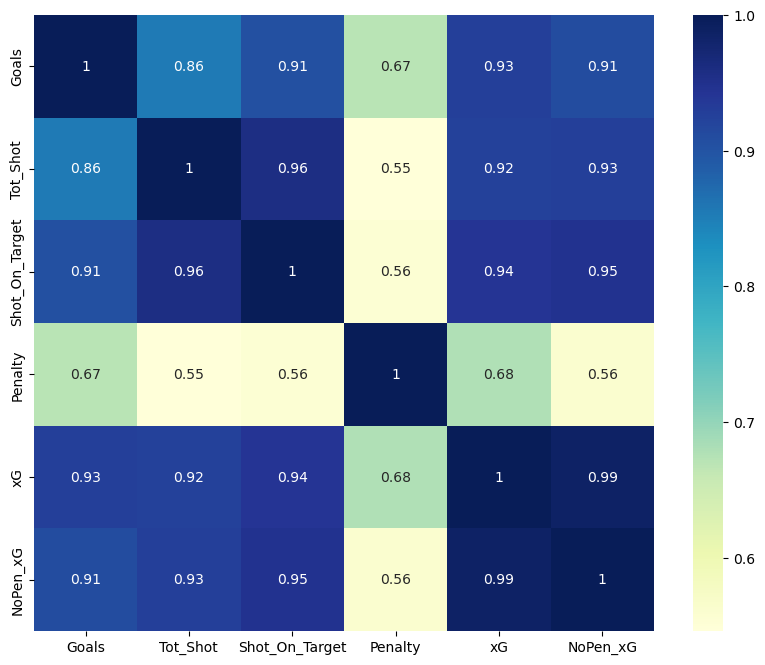

In [288]:

#According to the dateset these are the players which accumulated the most xG over the course of the season
#as we determine who had the most amount of goals during the season 
featureData = shooting_df[['Goals','Tot_Shot','Shot_On_Target','Penalty','xG','NoPen_xG']]


shot_correlation=featureData.corr()
plt.figure(figsize=(10,8))
sns.heatmap(shot_correlation,cmap="YlGnBu",annot=True)


shooting_df

Next we will create a bar chart to show the players that scored and also took the most shots over the course of the season

In [289]:
top20Shots = shooting_df.sort_values(by='Tot_Shot',ascending=False).head(20)
top20Goals = shooting_df.sort_values(by='Goals',ascending=False).head(20)
squad_count = top20Goals['Squad'].value_counts()

squad_count







Arsenal            4
Manchester City    2
Tottenham          2
Liverpool          2
Newcastle Utd      2
Leicester City     2
Brentford          1
Manchester Utd     1
Aston Villa        1
Fulham             1
Leeds United       1
Brighton           1
Name: Squad, dtype: int64

In [290]:
"""res=op.scatterplot(shooting_df, 
               x="Goals",
               y="xG", 
               category=['Squad'],
                marginal_dist=True,
                kde=True,
                regression=True,
                save="shooting.png")"""

'res=op.scatterplot(shooting_df, \n               x="Goals",\n               y="xG", \n               category=[\'Squad\'],\n                marginal_dist=True,\n                kde=True,\n                regression=True,\n                save="shooting.png")'

In [291]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

reg = LinearRegression()

x=shooting_df[['Tot_Shot','Shot_On_Target','xG','NoPen_xG']]
y=shooting_df['Goals']

print(shooting_df.columns)
feat = []
for column in shooting_df.columns:
    if pd.api.types.is_numeric_dtype(shooting_df[column]) and column !='Goals':
        feat.append(column)

X_to_select = shooting_df[feat]
y_to_predict = shooting_df.Goals

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

reg.fit(X_train,y_train)

print(reg.score(X_test,y_test))

y_pred=reg.predict(X_test)

regressor = LinearRegression()

from mlxtend.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(regressor,
                                k_features=5,
                                forward=True,
                                scoring='neg_mean_squared_error',
                                )

selected_features = sfs.fit(X_to_select, y_to_predict)

selected_features.k_feature_names_

#selected_features.feature_names




Index(['Player', 'Nation', 'Position', 'Squad', 'Age', '90s_played', 'Goals',
       'Tot_Shot', 'Shot_On_Target', 'Shot_Target_Rate', 'TotalShotPer90',
       'ShotTargetPer90', 'Goal/TotShot', 'Goal/ShotTarget', 'Penalty',
       'Att_Penalty', 'xG', 'NoPen_xG', 'NoPen_xGperShot', 'Goal-xG',
       'NoPen_Goal-xG'],
      dtype='object')
0.8400888602499488


('Age', 'Tot_Shot', 'xG', 'Goal-xG', 'NoPen_Goal-xG')

In [292]:
from sklearn.feature_selection import RFE,RFECV

refcv = RFECV(estimator=LinearRegression(), cv=5,min_features_to_select=3)
rfe = RFE(estimator=LinearRegression(), n_features_to_select=4)

rfe.fit(X_to_select,y_to_predict)
refcv.fit(X_to_select,y_to_predict)

"""
print(rfe.get_feature_names_out())

refcv.get_feature_names_out()

print(rfe.feature_names_in_)
rfe.ranking_"""

recursive_dict = {}
for features, ranking in zip(rfe.feature_names_in_,rfe.ranking_):
    recursive_dict[features] = ranking

recursive_df = pd.DataFrame(list(recursive_dict.items()),columns = ['Feature', 'Ranking'])

sort_lowest(recursive_df,'Ranking')


recursivecv_dict = {}
for features, ranking in zip(refcv.feature_names_in_,refcv.ranking_):
    recursivecv_dict[features] = ranking

recursivecv_df = pd.DataFrame(list(recursivecv_dict.items()),columns = ['Feature', 'Ranking'])

sort_lowest(recursivecv_df,'Ranking')

print(refcv.get_feature_names_out(),rfe.get_feature_names_out())


['Goal/ShotTarget' 'Penalty' 'xG' 'NoPen_xG' 'NoPen_xGperShot' 'Goal-xG'
 'NoPen_Goal-xG'] ['Penalty' 'xG' 'NoPen_xG' 'NoPen_Goal-xG']


In [317]:
test_dataset = pd.read_csv('/Users/cokoli1/Desktop/Personal Portfolio/Prem2022-23-data/players/test.csv')



test_features = ['Tot_Shot','Shot_On_Target','xG','NonPen_xG']

new_list = []
for i in range(len(test_dataset)):
    new_list.append(reg.predict([test_dataset[test_features].iloc[i]]).astype(float).round(2))

predicted_goals = [float(item) for array in new_list for item in array] 
test_dataset['Predicted_Goals'] = predicted_goals


test_dataset.sort_values(by='Predicted_Goals',inplace=True,ascending=False, ignore_index=True)


test_dataset

,Name,Tot_Shot,Shot_On_Target,xG,NonPen_xG,Goals,Team,Predicted_Goals
0,Erling Haaland,121,59,29.3,22.6,27,Manchester City,33.58
1,Mohammed Salah,114,56,21.2,15.0,18,Liverpool,26.91
2,Jamie Vardy,89,43,22.3,17.0,23,Leicester City,25.39
3,Alexander Isak,78,43,20.3,15.0,21,NewCastle United,24.56
4,Cole Palmer,108,46,18.2,10.9,22,Chelsea,23.30
5,Nicolas Jackson,80,41,18.6,18.6,14,Chelsea,19.12
6,Dominic Solanke,109,38,19.6,17.3,19,Bournemouth,18.94
7,Kun Aguero,94,42,16.2,13.1,21,Manchester City,18.84
8,Cristiano Ronaldo,110,43,17.7,15.4,18,Manchester United,18.70
9,Darwin Nunez,108,46,16.4,15.6,11,Liverpool,17.59


Text(0, 0.5, 'Goals vs Predicted_goals')

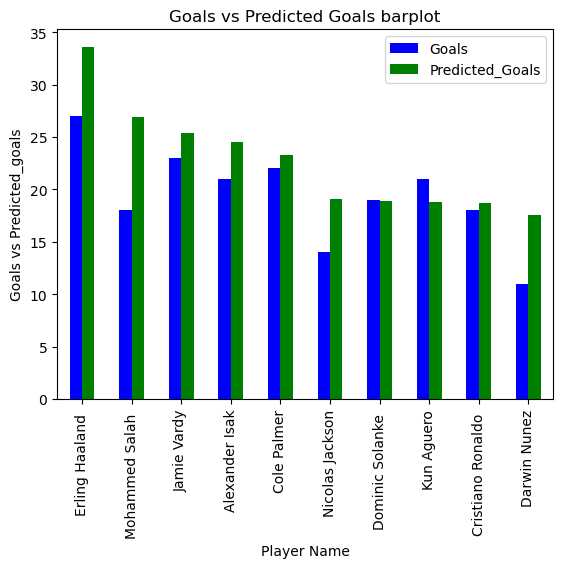

In [331]:

test_dataset.head(10).plot(
    x="Name ", y=["Goals", "Predicted_Goals"], kind="bar", color=['b', 'g']
)

plt.title("Goals vs Predicted Goals barplot")
plt.xlabel("Player Name")
plt.ylabel("Goals vs Predicted_goals")


In [294]:
x2_test = test_dataset[['Tot_Shot','Shot_On_Target','xG','NonPen_xG']]
Y2_test = test_dataset.Goals



print(reg.score(x2_test,Y2_test))

0.30409841351883016


In [295]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  

mse = mean_squared_error(test_dataset['Goals'], test_dataset['Predicted_Goals'])
rmse = mean_squared_error(test_dataset['Goals'], test_dataset['Predicted_Goals'],squared=False)
mae = mean_absolute_error(test_dataset['Goals'], test_dataset['Predicted_Goals'])

r2 = r2_score(test_dataset['Goals'], test_dataset['Predicted_Goals'])


print(f'MSE: {mse}')  
print(f'RMSE: {rmse}')  
print(f'MAE: {mae}')  
print(f'R-squared: {r2}')  

MSE: 13.517999999999999
RMSE: 3.6766832879648472
MAE: 2.9457142857142857
R-squared: 0.30435759763701997


In [296]:
from sklearn.model_selection import cross_val_score

linear_score = cross_val_score(reg, X_train, y_train, cv=4)
np.average(linear_score)

linear_score





array([0.84114622, 0.90140738, 0.78024474, 0.92894013])

In [297]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 

X=shooting_df[['Tot_Shot','Shot_On_Target','xG','NoPen_xG']]
y=shooting_df['Goals']



X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

model = DecisionTreeRegressor(max_leaf_nodes=80)

model.fit(X_train,y_train)

print(model.predict([[110,43,17.42,14]]))



print(model.score(X_test,y_test))



[14.5]
0.6716622978735225


In [298]:
rfeDT = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=4)

rfeDT.fit(X_to_select,y_to_predict)
rfeDT.get_feature_names_out()

array(['Shot_On_Target', 'Goal/TotShot', 'Goal/ShotTarget', 'xG'],
      dtype=object)

In [299]:
original_dataset = pd.read_csv('/Users/cokoli1/Desktop/Personal Portfolio/Prem2022-23-data/players/test.csv')
original_dataset

new_list = []
for i in range(len(test_dataset)):
    new_list.append(model.predict([original_dataset[test_features].iloc[i]]).astype(float).round(2))

predicted_goals = [float(item) for array in new_list for item in array] 
original_dataset['Predicted_Goals'] = predicted_goals

original_dataset





,Name,Tot_Shot,Shot_On_Target,xG,NonPen_xG,Goals,Team,Predicted_Goals
0,Cristiano Ronaldo,110,43,17.7,15.4,18,Manchester United,18.50
1,Kun Aguero,94,42,16.2,13.1,21,Manchester City,14.50
2,Erling Haaland,121,59,29.3,22.6,27,Manchester City,36.00
3,Cole Palmer,108,46,18.2,10.9,22,Chelsea,14.50
4,Alexander Isak,78,43,20.3,15.0,21,NewCastle United,14.50
5,Dominic Solanke,109,38,19.6,17.3,19,Bournemouth,18.50
6,Ollie Watkins,106,46,16.9,16.9,19,Aston Villa,18.50
7,Phil Foden,105,48,10.3,10.3,19,Manchester City,15.00
8,Mohammed Salah,114,56,21.2,15.0,18,Liverpool,30.00
9,Son Heung Min,85,40,12.1,10.5,17,Tottenham,9.67


In [300]:
x3_test = original_dataset[['Tot_Shot','Shot_On_Target','xG','NonPen_xG']]
Y3_test = original_dataset.Goals

model.score(x3_test,Y3_test)

mse = mean_squared_error(original_dataset['Goals'], original_dataset['Predicted_Goals'])
rmse = mean_squared_error(original_dataset['Goals'], original_dataset['Predicted_Goals'],squared=False)
mae = mean_absolute_error(original_dataset['Goals'], original_dataset['Predicted_Goals'])

r2 = r2_score(original_dataset['Goals'], original_dataset['Predicted_Goals'])

r2

-0.3573859665244501

In [301]:
DecisionTreeRegressor_score = cross_val_score(model, X_train, y_train, cv=4)
np.average(DecisionTreeRegressor_score)

DecisionTreeRegressor_score


array([0.64722417, 0.72361685, 0.68981437, 0.85698991])

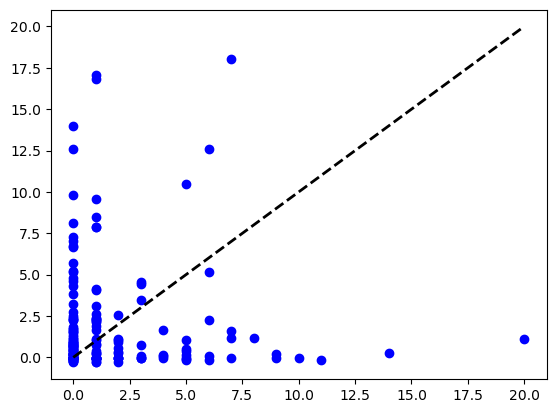

In [302]:
plt.scatter(y_test,y_pred,color='Blue')

plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2)
plt.show()

Text(0, 0.5, 'xG')

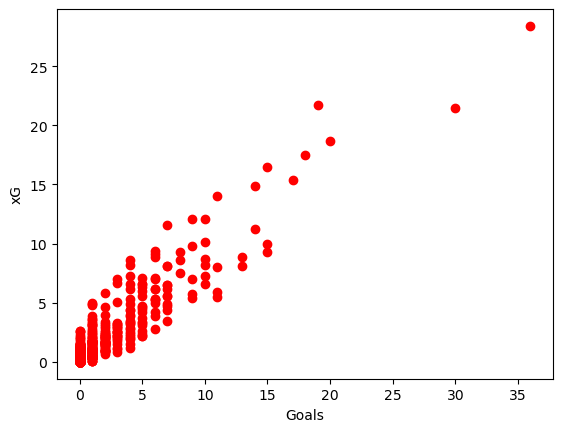

In [303]:
plt.scatter(x='Goals',y='xG', data=shooting_df,c='Red')
#plt.plot(x,y,color='green')
plt.xlabel('Goals')
plt.ylabel('xG')

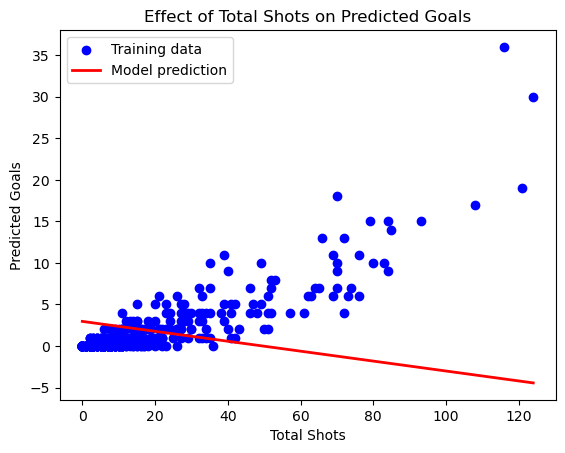

In [304]:
import numpy as np  
  
# Get the mean values for the features  
mean_values = np.mean(X_train, axis=0)  
  
# Now, let's choose 'Tot_Shot' (the first feature) and vary it across its range  
# while keeping the other features fixed at their mean values.  
tot_shots_range = np.linspace(X_train['Tot_Shot'].min(), X_train['Tot_Shot'].max(), 100)  
predictions = []  
  
for shot in tot_shots_range:  
    # We create a feature vector where 'Tot_Shot' varies, but other features are constant  
    feature_vector = np.array([shot, mean_values['Shot_On_Target'], mean_values['xG'], mean_values['NoPen_xG']])  
    # Predict the goal for each feature vector  
    predicted_goal = reg.predict([feature_vector])  
    predictions.append(predicted_goal)  
  
# Plot the relationship between 'Tot_Shot' and predicted goals  
plt.scatter(X_train['Tot_Shot'], y_train, color='blue', label='Training data')  
plt.plot(tot_shots_range, predictions, color='red', linewidth=2, label='Model prediction')  
plt.xlabel('Total Shots')  
plt.ylabel('Predicted Goals')  
plt.title('Effect of Total Shots on Predicted Goals')  
plt.legend()  
plt.show()  


,Age,Total Goals
0,15,0
1,16,0
2,17,8
3,18,10
4,19,7
5,20,29
6,21,49
7,22,128
8,23,97
9,24,102


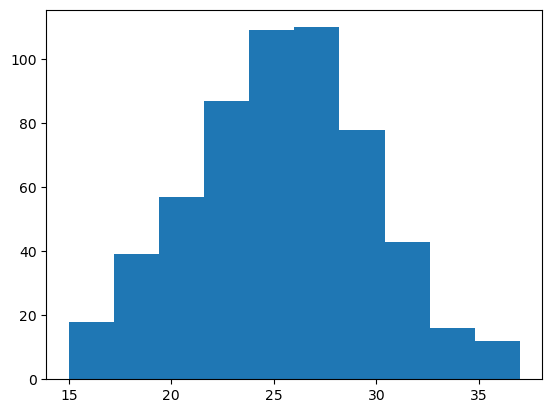

In [305]:

Age_group=shooting_df.groupby(by='Age')['Goals'].sum().reset_index()
Age_group.rename(columns={'Goals':'Total Goals'},inplace=True)
age_dist = plt.hist(shooting_df['Age'])
Age_group

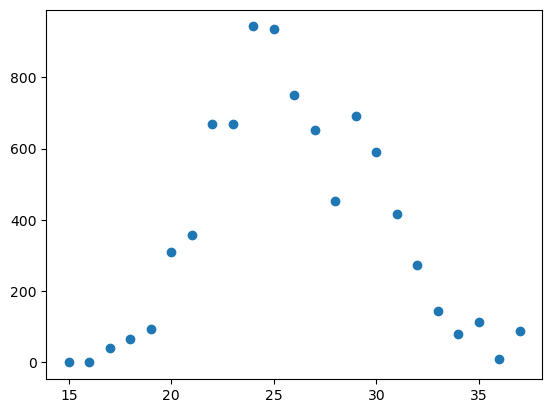

In [306]:

FullGames_group=shooting_df.groupby(by='Age')['90s_played'].sum().reset_index()
FullGames_group.rename(columns={'90s_played':'Total_90s'},inplace=True)
plt.scatter(x='Age',y='Total_90s',data=FullGames_group)

In [307]:
features_to_sum= ['Squad','Goals','Tot_Shot','Shot_On_Target','TotalShotPer90','Goal/TotShot','Goal/ShotTarget','Penalty','Att_Penalty','xG','NoPen_xG','NoPen_xGperShot','Goal-xG','NoPen_Goal-xG']
features_for_average = ['Squad','Age','90s_played','Shot_Target_Rate']
squad_totals=shooting[features_to_sum].groupby('Squad').sum()
#squad_totals.drop(columns=['Unnamed: 0'],inplace=True)
averages= shooting_df[features_for_average].groupby('Squad').mean()

new_df = averages.join(squad_totals, how='inner', on= 'Squad')
new_df[['Age','90s_played','Shot_Target_Rate']] = new_df[['Age','90s_played','Shot_Target_Rate']].round(2)

new_df

,Age,90s_played,Shot_Target_Rate,Goals,Tot_Shot,Shot_On_Target,TotalShotPer90,Goal/TotShot,Goal/ShotTarget,Penalty,Att_Penalty,xG,NoPen_xG,NoPen_xGperShot,Goal-xG,NoPen_Goal-xG
Squad,,,,,,,,,,,,,,,,
Arsenal,23.96,16.07,24.88,84,589,194,33.40,3.25,8.02,3,4,73.4,70.5,2.06,10.6,10.5
Aston Villa,26.58,16.06,21.19,49,427,145,31.26,1.50,4.39,3,4,51.2,48.1,1.81,-2.2,-2.1
Bournemouth,25.26,13.48,24.93,37,358,126,25.83,1.72,4.83,0,0,39.6,39.6,2.40,-2.6,-2.6
Brentford,25.00,16.72,29.19,56,400,147,32.90,1.75,4.56,7,8,58.3,52.0,2.67,-2.3,-3.0
Brighton,23.48,14.42,23.52,68,607,219,54.76,1.78,4.48,6,6,75.6,70.8,2.74,-7.6,-8.8
Chelsea,24.66,13.03,26.02,37,481,151,41.85,1.63,5.35,3,3,50.1,47.7,2.62,-13.1,-13.7
Crystal Palace,25.65,16.03,21.23,38,423,133,24.62,1.47,3.71,1,3,39.9,37.4,2.03,-1.9,-0.4
Everton,25.43,14.90,27.05,32,426,143,33.53,1.57,4.73,3,3,46.3,44.0,2.75,-14.3,-15.0
Fulham,26.48,14.38,24.58,52,420,137,37.91,2.40,6.57,5,9,47.4,40.3,1.93,4.6,6.7


# # Most goals scored 

In [308]:
sort_highest(new_df,'Goals')

,Age,90s_played,Shot_Target_Rate,Goals,Tot_Shot,Shot_On_Target,TotalShotPer90,Goal/TotShot,Goal/ShotTarget,Penalty,Att_Penalty,xG,NoPen_xG,NoPen_xGperShot,Goal-xG,NoPen_Goal-xG
0,25.46,17.38,22.25,92,590,205,30.78,1.75,5.26,9,10,80.4,72.6,2.03,11.6,10.4
1,23.96,16.07,24.88,84,589,194,33.40,3.25,8.02,3,4,73.4,70.5,2.06,10.6,10.5
2,25.36,14.91,25.48,71,601,203,39.69,2.13,5.55,2,4,73.5,70.3,2.40,-2.5,-1.3
3,25.14,14.40,23.79,68,512,186,43.59,2.16,6.27,5,6,58.0,53.2,2.03,10.0,9.8
4,23.48,14.42,23.52,68,607,219,54.76,1.78,4.48,6,6,75.6,70.8,2.74,-7.6,-8.8
5,26.37,15.45,19.58,64,565,184,36.35,1.45,4.42,6,6,74.5,69.8,2.09,-10.5,-11.8
6,25.00,16.72,29.19,56,400,147,32.90,1.75,4.56,7,8,58.3,52.0,2.67,-2.3,-3.0
7,25.62,16.04,25.93,56,590,206,37.12,1.47,4.71,3,3,69.2,66.9,2.45,-13.2,-13.9
8,26.48,14.38,24.58,52,420,137,37.91,2.40,6.57,5,9,47.4,40.3,1.93,4.6,6.7
9,26.58,16.06,21.19,49,427,145,31.26,1.50,4.39,3,4,51.2,48.1,1.81,-2.2,-2.1


In [309]:
sort_highest(new_df, 'Goal-xG')

,Age,90s_played,Shot_Target_Rate,Goals,Tot_Shot,Shot_On_Target,TotalShotPer90,Goal/TotShot,Goal/ShotTarget,Penalty,Att_Penalty,xG,NoPen_xG,NoPen_xGperShot,Goal-xG,NoPen_Goal-xG
0,25.46,17.38,22.25,92,590,205,30.78,1.75,5.26,9,10,80.4,72.6,2.03,11.6,10.4
1,23.96,16.07,24.88,84,589,194,33.40,3.25,8.02,3,4,73.4,70.5,2.06,10.6,10.5
2,25.14,14.40,23.79,68,512,186,43.59,2.16,6.27,5,6,58.0,53.2,2.03,10.0,9.8
3,26.48,14.38,24.58,52,420,137,37.91,2.40,6.57,5,9,47.4,40.3,1.93,4.6,6.7
4,25.65,16.03,21.23,38,423,133,24.62,1.47,3.71,1,3,39.9,37.4,2.03,-1.9,-0.4
5,26.58,16.06,21.19,49,427,145,31.26,1.50,4.39,3,4,51.2,48.1,1.81,-2.2,-2.1
6,23.81,11.61,25.00,36,413,132,28.38,1.55,4.49,2,4,38.2,35.0,1.84,-2.2,-1.0
7,25.00,16.72,29.19,56,400,147,32.90,1.75,4.56,7,8,58.3,52.0,2.67,-2.3,-3.0
8,25.36,14.91,25.48,71,601,203,39.69,2.13,5.55,2,4,73.5,70.3,2.40,-2.5,-1.3
9,25.61,14.92,28.62,49,412,142,25.25,2.95,7.81,3,6,51.5,46.2,2.66,-2.5,-0.2


[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
